In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as pl
import geopandas as gpd
import shapely

In order to create Transit Desert Index, we set coefficients for each variables below. The detailed information is given in the project document.

In [7]:
gdf=gpd.GeoDataFrame.from_file('test.shp')
gdf['score'] = 0.5*gdf['z_popdens'] - 0.4*gdf['z_sub'] - 0.1*gdf['z_bus'] 
#gdf['score'] = 1*gdf['z_popdens'] - 1*gdf['z_sub'] - 1*gdf['z_bus'] 
per = np.percentile(gdf['score'].values, q = [25,50,75])

gdf['quantile'] = gdf['score'].map(lambda x: 4 if x < per[0] else 3 if x < per[1] else 2 if x < per[2] else 1)
gdf

,boro_ct201,ntaname,Population,min_dist_s,z_sub,z_bus,z_pop,z_popdens,geometry,score,quantile
0,5000900,West New Brighton-New Brighton-St. George,2112,0.057850,1.592740,0.233587,-0.764058,-0.722976,POLYGON ((-74.07920577013245 40.64343078374567...,-1.021943,4
1,1009800,Turtle Bay-East Midtown,7316,0.002180,-0.465713,-0.146835,1.627904,1.631853,POLYGON ((-73.96432543478758 40.75638153099091...,1.016895,1
2,1010000,Turtle Bay-East Midtown,1992,0.001180,-0.502667,-0.903116,-0.819215,-0.547297,POLYGON ((-73.96802436915851 40.75957814005282...,0.017730,3
3,1010200,Midtown-Midtown South,230,0.001074,-0.506612,-0.761419,-1.629099,-1.292691,POLYGON ((-73.97124277307127 40.76093641847906...,-0.367559,4
4,1010400,Midtown-Midtown South,966,0.000593,-0.524381,-0.001270,-1.290805,-0.982150,POLYGON ((-73.97445730550224 40.76229308352487...,-0.281196,3
5,1011300,Midtown-Midtown South,117,0.000637,-0.522755,-0.459335,-1.681038,-1.341272,"POLYGON ((-73.98411754823195 40.7548420534646,...",-0.415600,4
6,1011402,Upper East Side-Carnegie Hill,2397,0.000823,-0.515881,-0.735128,-0.633061,0.384145,POLYGON ((-73.96475544914023 40.76405707059968...,0.471938,1
7,1013000,Upper East Side-Carnegie Hill,4195,0.004675,-0.373427,-0.888298,0.193370,0.331350,POLYGON ((-73.96147581181627 40.77432401139124...,0.403876,2
8,1014000,Upper East Side-Carnegie Hill,7813,0.002835,-0.441480,-0.248439,1.856345,1.802723,POLYGON ((-73.95494520074165 40.77750394666422...,1.102798,1
9,1014801,Upper East Side-Carnegie Hill,2863,0.000811,-0.516314,-0.629374,-0.418869,2.639197,POLYGON ((-73.95398370221397 40.77882211011827...,1.589061,1


(-74.28337047811618, -73.67222994890714, 40.4751445260786, 40.93650364609694)

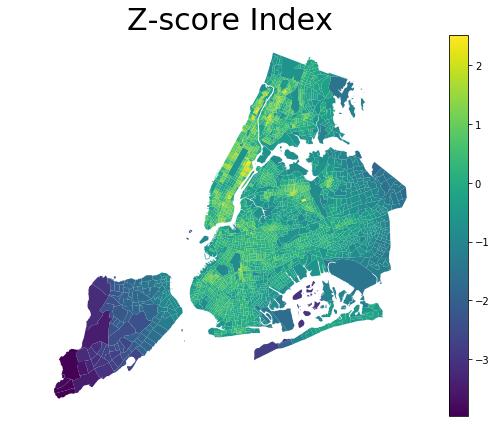

In [8]:
fig = pl.figure(figsize=(40,7))
ax1 = fig.add_subplot(141)
ax1.set_title('Z-score Index', fontsize=30)
gdf.plot(column='score', cmap='viridis', ax=ax1, legend=True)
ax1.axis('off')

In [9]:
gdf.sort_values('score',ascending=False)
gdf1 = gdf.drop(1876)

In [10]:
gdf2 = gdf1[(gdf1['boro_ct201'] < 5000000)]
#gdf2 = gdf2[(gdf2['boro_ct201'] > 3000000)]


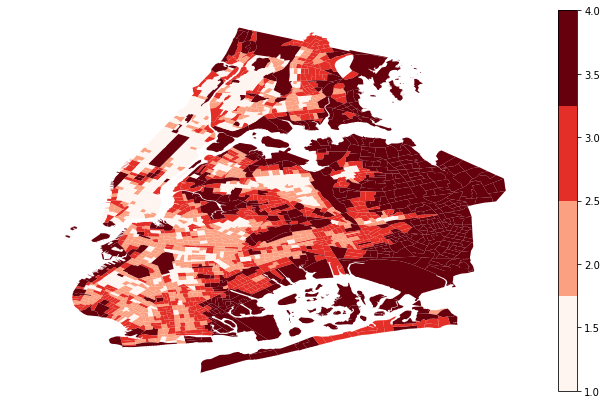

In [55]:
#import matplotlib.pyplot as plt
fig = pl.figure(figsize=(50,7))
ax1 = fig.add_subplot(141)
#ax1.set_title('Z-score Index', fontsize=30)

#gdf2.plot(column='quantile', cmap='OrRd', ax=ax1, legend=True) #, scheme='quantiles'
#gdf2.plot(column='score', cmap=pl.cm.get_cmap('Blues', 4), ax=ax1,) #, scheme='quantiles'
gdf2.plot(column='quantile', cmap=pl.cm.get_cmap('Reds', 4), ax=ax1, legend=True)

# pl.colorbar(ticks=range(6), label='digit value')
# pl.clim(-0.5, 5.5)
ax1.axis('off')
pl.savefig('test.png')

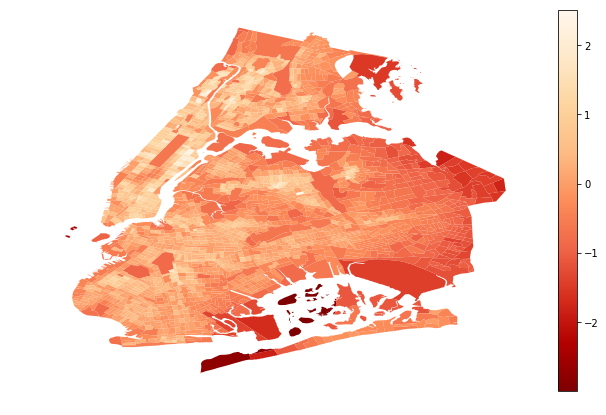

In [11]:
#import matplotlib.pyplot as plt
fig = pl.figure(figsize=(50,7))
ax1 = fig.add_subplot(141)
#ax1.set_title('Z-score Index', fontsize=30)
gdf2.plot(column='score', cmap='OrRd_r', ax=ax1, legend=True)
ax1.axis('off')
pl.savefig('test.png')

(-74.06511565512534, -73.68262303571625, 40.523149019625436, 40.9342177178328)

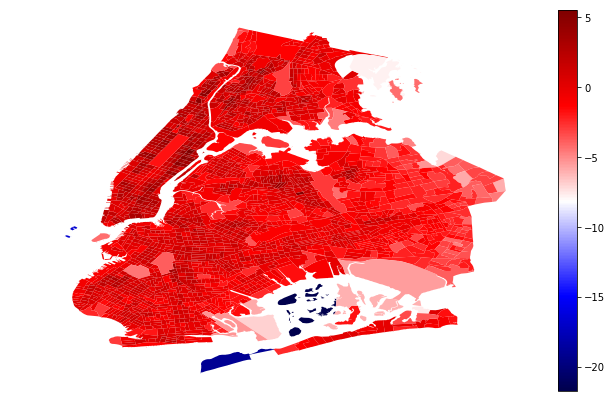

In [24]:
fig = pl.figure(figsize=(50,7))
ax1 = fig.add_subplot(141)
#ax1.set_title('Z-score Index', fontsize=30)
gdf2.plot(column='score', cmap='seismic', ax=ax1, legend=True)
ax1.axis('off')